In [1]:
from apiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow

# The CLIENT_SECRETS_FILE variable specifies the name of a file that contains
# the OAuth 2.0 information for this application, including its client_id and
# client_secret.

CLIENT_SECRET_FILE = 'client_secret.json'
SCOPES = ['https://www.googleapis.com/auth/youtube.force-ssl'] #['https://www.googleapis.com/auth/youtube']

In [3]:
"""Steps to authorize the application so that it will be able to fetch data:
1. Run this cell
2. Visit the url given below:
https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=767560891748-jbk021sppcve1umf80mg86i9feurctbr.apps.
googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyoutube.
force-ssl&state=aNFoL7KyYKJltw7zWlJSHInVPJYXKc&prompt=consent&access_type=offline
3. Sign in with your Google account
4. It will say that 'The app isn't verified' but dont worry about it Google is just warning you about an unknown app.
But you know that it is harmless as it will just fetch the data and do sentiment analysis. So you can just click on Advanced.
5. Click on 'Go to Yt Comments Sentiment Analysis (unsafe)'
6. Click on Allow
7. Lastly, click on allow
8. Copy the token given and paste it in the input box below and press Enter.
"""

API_SERVICE_NAME = 'youtube'
API_VERSION = 'v3'

def get_authenticated_service():
    flow = InstalledAppFlow.from_client_secrets_file(CLIENT_SECRET_FILE, SCOPES)
    credentials = flow.run_console()
    return build(API_SERVICE_NAME, API_VERSION, credentials = credentials)

service = get_authenticated_service()

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=767560891748-jbk021sppcve1umf80mg86i9feurctbr.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyoutube.force-ssl&state=i1ZHCzC0aqjkX9lbkRjA5MLqpLpKFE&prompt=consent&access_type=offline
Enter the authorization code: 4/yAEsTrfW7t-9XKUv_XPDz-LKkhzksxEeCsszSh6ZrwQpYtzlw9oxk6g


In [4]:
service

#### Giving the input of the Youtube video url/Title

In [5]:
# Search Query Initialisation

query = input("Enter your Video url/Title here: ").strip()

#Lets take the video for eg : https://www.youtube.com/watch?v=s1H8EzGGPLA

query_results = service.search().list(
        part = 'snippet',
        q = query,
        order = 'relevance', # You can consider using viewCount
        maxResults = 1,
        type = 'video', # Channels might appear in search results
        relevanceLanguage = 'en',
        safeSearch = 'moderate',
        ).execute()
print(query_results)
print()
print(query_results['items'])

# Get Video IDs

video_id = []
channel = []
video_title = []
video_desc = []
for item in query_results['items']:
    video_id.append(item['id']['videoId'])
    channel.append(item['snippet']['channelTitle'])
    video_title.append(item['snippet']['title'])
    video_desc.append(item['snippet']['description'])

Enter your Video url/Title here: https://www.youtube.com/watch?v=s1H8EzGGPLA  
{'kind': 'youtube#searchListResponse', 'etag': '"ksCrgYQhtFrXgbHAhi9Fo5t0C2I/Gm5qsZ3V6ay_Jb1rpkK2oVOXYNg"', 'nextPageToken': 'CAEQAA', 'regionCode': 'IN', 'pageInfo': {'totalResults': 7, 'resultsPerPage': 1}, 'items': [{'kind': 'youtube#searchResult', 'etag': '"ksCrgYQhtFrXgbHAhi9Fo5t0C2I/p7HEquEcQ4oU0HIRMZiECwKWx00"', 'id': {'kind': 'youtube#video', 'videoId': 's1H8EzGGPLA'}, 'snippet': {'publishedAt': '2017-05-02T17:25:29.000Z', 'channelId': 'UCPxMZIFE856tbTfdkdjzTSQ', 'title': 'How to Dress Well for Indian men | Ranveer&#39;s LifeHacks | BeerBiceps Fashion', 'description': 'Subscribe to our HINDI YouTube Channel : https://www.youtube.com/c/RanveerAllahbadia INSTAGRAM : @beerbiceps www.facebook.com/beerbiceps Lee ...', 'thumbnails': {'default': {'url': 'https://i.ytimg.com/vi/s1H8EzGGPLA/default.jpg', 'width': 120, 'height': 90}, 'medium': {'url': 'https://i.ytimg.com/vi/s1H8EzGGPLA/mqdefault.jpg', 'width'

In [6]:
from googleapiclient.errors import HttpError

In [7]:
video_id_pop = []
channel_pop = []
video_title_pop = []
video_desc_pop = []
comments_pop = []
comment_id_pop = []
reply_count_pop = []
like_count_pop = []

from tqdm import tqdm
for i, video in enumerate(tqdm(video_id, ncols = 100)):
    response = service.commentThreads().list(
                    part = 'snippet',
                    videoId = video,
                    maxResults = 100, # Only take top 100 comments...
                    order = 'relevance', #... ranked on relevance
                    textFormat = 'plainText',
                    ).execute()

    comments_temp = []
    comment_id_temp = []
    reply_count_temp = []
    like_count_temp = []
    for item in response['items']:
        comments_temp.append(item['snippet']['topLevelComment']['snippet']['textDisplay'])
        comment_id_temp.append(item['snippet']['topLevelComment']['id'])
        reply_count_temp.append(item['snippet']['totalReplyCount'])
        like_count_temp.append(item['snippet']['topLevelComment']['snippet']['likeCount'])
    comments_pop.extend(comments_temp)
    comment_id_pop.extend(comment_id_temp)
    reply_count_pop.extend(reply_count_temp)
    like_count_pop.extend(like_count_temp)
    
video_id_pop.extend([video_id[i]])
channel_pop.extend([channel[i]])
video_title_pop.extend([video_title[i]])
video_desc_pop.extend([video_desc[i]])
query_pop = [query]

100%|█████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.64it/s]


#### Storing the video information like Title and description in a dictionary:

In [8]:
import pandas as pd

info_dict = {
        'Query': query_pop,
        'Channel': channel_pop,
        'Video Title': video_title_pop,
        'Video Description': video_desc_pop,
        'Video ID': video_id_pop,
        }

In [9]:
info_dict

{'Query': ['https://www.youtube.com/watch?v=s1H8EzGGPLA'],
 'Channel': ['BeerBiceps'],
 'Video Title': ['How to Dress Well for Indian men | Ranveer&#39;s LifeHacks | BeerBiceps Fashion'],
 'Video Description': ['Subscribe to our HINDI YouTube Channel : https://www.youtube.com/c/RanveerAllahbadia INSTAGRAM : @beerbiceps www.facebook.com/beerbiceps Lee ...'],
 'Video ID': ['s1H8EzGGPLA']}

In [10]:
info_dict["Video Title"]

['How to Dress Well for Indian men | Ranveer&#39;s LifeHacks | BeerBiceps Fashion']

### Storing the info of the top comments on the video i.e. the comment and likes to the comment in a dictionary and then putting it in a dataframe named comments_df :

In [11]:
#import pandas as pd

comments_dict = {
        'Comment': comments_pop,
        'Comment ID': comment_id_pop,
        'Replies': reply_count_pop,
        'Likes': like_count_pop,
        }
print("number of top comments taken: ", len(comments_pop))
comments_df = pd.DataFrame(comments_dict, columns = comments_dict.keys())

number of top comments taken:  100


In [12]:
comments_df.head(10)

,Comment,Comment ID,Replies,Likes
0,Next up : https://youtu.be/qUzD_yVwQi8,Ugj9oe4W_hoah3gCoAEC,43,326
1,How to dress sexy\nStep 1- go to the gym\nStep...,UghY7AP7KrW1oXgCoAEC,26,1217
2,zara is a budget brand.\n -ranveer allah...,UgxMLCZDTfOwBHF3UYF4AaABAg,5,191
3,Butt\nButtt\nWithout money every thing is waste,Ugzf8MB8PuTbRQfhgm14AaABAg,4,367
4,"Cool, i have 1 pair of shoes and 1 wrist watch...",UgwebMo-LTmOUq52dBp4AaABAg,5,135
5,How many middle class boys have a shoe wardro...,Ugzh1nwOR8qW9oBeYn14AaABAg,5,115
6,How to dress sexy?\nGo to gym + earn money + d...,UgwnKD7nmFKhW-UpwwV4AaABAg,0,55
7,Everyone can dress up well if they have enough...,UgyfU_0vnkD3fh9p2fp4AaABAg,1,23
8,Bhai tere jaisa paisa nhi h.. Kuch budget wall...,UgzT-l787uhuk5K9WmB4AaABAg,4,178
9,his jeans is to baggy,Ugx_R4h-lQkJ0sr-7wx4AaABAg,2,70


#### Taking the first comment into consideration to see how the code is working

In [13]:
comments_pop[1]

'How to dress sexy\nStep 1- go to the gym\nStep 2- be regular'

#### Using re module to clean the comments from unnecessary stuff

In [14]:
import re
refined_comment = re.sub('[^A-Za-z0-9 ]+', ' ', comments_pop[1])
print(refined_comment)

How to dress sexy Step 1  go to the gym Step 2  be regular


#### A list called refined_comments_pop to put the clean comments into

In [15]:
refined_comments_pop = []
for i in comments_pop:
    refined_comment = re.sub('[^A-Za-z0-9 ]+', ' ', i)
    refined_comments_pop.append(refined_comment)

#### Checking to see if the 1st comment is clean:

In [17]:
refined_comments_pop[1]

'How to dress sexy Step 1  go to the gym Step 2  be regular'

#### Making a dictionary to store refined comments and then amking a dataframe called refined_comments_df out of it

In [18]:
refined_comments_dict = {
        'Comment': refined_comments_pop,
        'Comment ID': comment_id_pop,
        'Replies': reply_count_pop,
        'Likes': like_count_pop,
        }
refined_comments_df = pd.DataFrame(refined_comments_dict, columns = refined_comments_dict.keys())

refined_comments_df.head(10)

,Comment,Comment ID,Replies,Likes
0,Next up https youtu be qUzD yVwQi8,Ugj9oe4W_hoah3gCoAEC,43,326
1,How to dress sexy Step 1 go to the gym Step 2...,UghY7AP7KrW1oXgCoAEC,26,1217
2,zara is a budget brand ranveer allahab...,UgxMLCZDTfOwBHF3UYF4AaABAg,5,191
3,Butt Buttt Without money every thing is waste,Ugzf8MB8PuTbRQfhgm14AaABAg,4,367
4,Cool i have 1 pair of shoes and 1 wrist watch...,UgwebMo-LTmOUq52dBp4AaABAg,5,135
5,How many middle class boys have a shoe wardro...,Ugzh1nwOR8qW9oBeYn14AaABAg,5,115
6,How to dress sexy Go to gym earn money don...,UgwnKD7nmFKhW-UpwwV4AaABAg,0,55
7,Everyone can dress up well if they have enough...,UgyfU_0vnkD3fh9p2fp4AaABAg,1,23
8,Bhai tere jaisa paisa nhi h Kuch budget walla...,UgzT-l787uhuk5K9WmB4AaABAg,4,178
9,his jeans is to baggy,Ugx_R4h-lQkJ0sr-7wx4AaABAg,2,70


#### Making a dataframe df with selected columns:

In [19]:
COLS = ['Comment','Likes', 'sentiment','subjectivity','polarity','weighted polarity']
df = pd.DataFrame(columns=COLS)

In [20]:
from textblob import TextBlob
from itertools import islice

for index, row in islice(refined_comments_df.iterrows(), 0, None):
    new_entry = []
    text_lower =row['Comment'].lower()
    
    blob = TextBlob(text_lower)
    sentiment = blob.sentiment
    
    polarity = sentiment.polarity
    if row['Likes'] > 0:
        weighted_polarity = polarity * row['Likes']
    else:
        weighted_polarity = polarity
    subjectivity = sentiment.subjectivity
    likes = row['Likes']
    
    new_entry += [text_lower,likes,sentiment,subjectivity,polarity,weighted_polarity]
    
    final_df = pd.DataFrame([new_entry], columns=COLS)
    df = df.append(final_df, ignore_index=True)

In [21]:
df.head(10)

,Comment,Likes,sentiment,subjectivity,polarity,weighted polarity
0,next up https youtu be quzd yvwqi8,326,"(0.0, 0.0)",0.000000,0.000000,0.000000
1,how to dress sexy step 1 go to the gym step 2...,1217,"(0.25, 0.5384615384615384)",0.538462,0.250000,304.250000
2,zara is a budget brand ranveer allahab...,191,"(0.0, 0.0)",0.000000,0.000000,0.000000
3,butt buttt without money every thing is waste,367,"(-0.2, 0.0)",0.000000,-0.200000,-73.400000
4,cool i have 1 pair of shoes and 1 wrist watch...,135,"(0.575, 0.675)",0.675000,0.575000,77.625000
5,how many middle class boys have a shoe wardro...,115,"(0.11904761904761904, 0.3773809523809524)",0.377381,0.119048,13.690476
6,how to dress sexy go to gym earn money don...,55,"(0.35, 0.6)",0.600000,0.350000,19.250000
7,everyone can dress up well if they have enough...,23,"(0.0, 0.5)",0.500000,0.000000,0.000000
8,bhai tere jaisa paisa nhi h kuch budget walla...,178,"(0.0, 0.0)",0.000000,0.000000,0.000000
9,his jeans is to baggy,70,"(0.0, 0.0)",0.000000,0.000000,0.000000


In [22]:
#exporting to csv
df.to_csv('comments sentiment analysis.csv', mode='w', columns=COLS, index=False, encoding="utf-8")

In [23]:
avg_polarity = sum(df['polarity'])/len(df)
print("average polarity is:", avg_polarity)
print("-"*80)
weighted_avg_polarity = sum(df['weighted polarity']/(len(df) + sum(df['Likes']) ) )
print("Weighted average polarity is:", weighted_avg_polarity)

average polarity is: 0.21630727513227513
--------------------------------------------------------------------------------
Weighted average polarity is: 0.19287798667189673


#### Now generating a General report on how the video is being received:

In [24]:
#printing our analysis
print("How people are reacting on " + str(info_dict["Video Title"]) + " by analyzing " + str(len(df)) + " comments.") #We have taken 100 comments refer #get comments cell
print()
print("General Report: ")
if (weighted_avg_polarity == 0):
    print("Neutral")
elif (weighted_avg_polarity > 0 and weighted_avg_polarity <= 0.3):
    print("Weakly Positive")
elif (weighted_avg_polarity > 0.3 and weighted_avg_polarity <= 0.6):
    print("Positive")
elif (weighted_avg_polarity > 0.6 and weighted_avg_polarity <= 1):
    print("Strongly Positive")
elif (weighted_avg_polarity > -0.3 and weighted_avg_polarity <= 0):
    print("Weakly Negative")
elif (weighted_avg_polarity > -0.6 and weighted_avg_polarity <= -0.3):
    print("Negative")
elif (weighted_avg_polarity > -1 and weighted_avg_polarity <= -0.6):
    print("Strongly Negative")

How people are reacting on ['How to Dress Well for Indian men | Ranveer&#39;s LifeHacks | BeerBiceps Fashion'] by analyzing 100 comments.

General Report: 
Weakly Positive


In [25]:
#For a detailed report
df2 = df.loc[:, ['polarity', 'Likes']] #using .iloc it would be df2 = df.iloc[:, [1,4]] col index 1 and 4
df2.head(5)

,polarity,Likes
0,0.000,326
1,0.250,1217
2,0.000,191
3,-0.200,367
4,0.575,135


#### Printing a detailed report

In [26]:
positive = 0
wpositive = 0
spositive = 0
negative = 0
wnegative = 0
snegative = 0
neutral = 0

for index, row in islice(df2.iterrows(), 0, None):
    if (row['polarity'] == 0.0):
        neutral += 1 #person: the one who commented gave neutral reaction
        neutral += row['Likes'] #The people who liked the comment have the same reaction
    elif (row['polarity'] > 0.3 and row['polarity'] <=0.3):
        wpositive += 1
        wpositive += row['Likes']
    elif (row['polarity'] > 0.3 and row['polarity'] <= 0.6):
        positive += 1
        positive += row['Likes']
    elif (row['polarity'] > 0.6 and row['polarity'] <= 1):
        spositive += 1
        spositive += row['Likes']
    elif (row['polarity'] > -0.3 and row['polarity'] <= 0):
        wnegative += 1
        wnegative += row['Likes']
    elif (row['polarity'] > -0.6 and row['polarity'] <= -0.3):
        negative += 1
        negative += row['Likes']
    elif (row['polarity'] > -1 and row['polarity'] <= -0.6):
        snegative += 1
        snegative += row['Likes']

Total_reactions = positive + wpositive +spositive + negative +wnegative + snegative + neutral
percent_positive = positive /Total_reactions
percent_wpositive = wpositive/Total_reactions
percent_spositive = spositive/Total_reactions
percent_negative = negative/Total_reactions
percent_wnegative = wnegative/Total_reactions
percent_snegative = snegative/Total_reactions
percent_neutral = neutral/Total_reactions

In [27]:
print("Detailed Report :")
print("-"*80)

print(str("{0:.2f}".format(percent_positive)) + "% people thought it was positive")
print(str("{0:.2f}".format(percent_wpositive)) + "% people thought it was weakly positive")
print(str("{0:.2f}".format(percent_spositive)) + "% people thought it was strongly positive")
print(str("{0:.2f}".format(percent_negative)) + "% people thought it was negative")
print(str("{0:.2f}".format(percent_wnegative)) + "% people thought it was weakly negative")
print(str("{0:.2f}".format(percent_snegative)) + "% people thought it was strongly negative")
print(str("{0:.2f}".format(percent_neutral)) + "% people thought it was neutral")

Detailed Report :
--------------------------------------------------------------------------------
0.16% people thought it was positive
0.00% people thought it was weakly positive
0.18% people thought it was strongly positive
0.00% people thought it was negative
0.08% people thought it was weakly negative
0.00% people thought it was strongly negative
0.58% people thought it was neutral


####  Plotting a Pie chart to show the sentiments

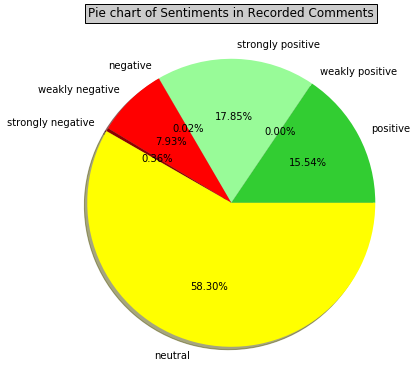

In [28]:
import matplotlib.pyplot as plt

# Data to plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes((0,0,.5,1))
ax.set_title('Pie chart of Sentiments in Recorded Comments', 
             bbox={'facecolor':'0.8', 'pad':3})
labels = 'positive', 'weakly positive', 'strongly positive', 'negative','weakly negative', 'strongly negative', 'neutral'
sizes = [positive, wpositive, spositive, negative, wnegative , snegative, neutral]
colors = ['limegreen', 'forestgreen', 'palegreen', 'orangered', 'red','darkred', 'yellow',]
explode = (0, 0, 0, 0, 0, 0, 0)  

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.2f%%', shadow=True)
plt.show()